In [1]:
from google.colab import files
uploaded = files.upload()

Saving earthquakes.csv to earthquakes.csv


In [2]:
import pandas as pd

# Load the dataset (replace 'your_file.csv' with the actual filename)
df = pd.read_csv('earthquakes.csv')

# Display the first few rows of the dataframe
print(df.head())

           id  magnitude        type  \
0  us7000necw        4.8  earthquake   
1  tx2024shcj        5.1  earthquake   
2  ci40734823        3.7  earthquake   
3  tx2024scvz        3.9  earthquake   
4  us7000ndte        4.1  earthquake   

                                        title                 date  \
0         M 4.8 - 33 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
1         M 5.1 - 34 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
2                M 3.7 - 6 km N of Malibu, CA  2024-09-16T11:22:08   
3  M 3.9 - 58 km S of Whites City, New Mexico  2024-09-14T17:01:06   
4  M 4.1 - 60 km S of Whites City, New Mexico  2024-09-14T17:01:06   

            time        updated  \
0  1726534182289  1726583895255   
1  1726534182183  1726672002991   
2  1726485728190  1726637414586   
3  1726333266539  1726584426218   
4  1726333266382  1726334616179   

                                                 url  \
0  https://earthquake.usgs.gov/earthquakes/eventp...   
1  https://eart

In [14]:
df.isnull().sum()  # Check for missing values in each column
df = df.dropna()  # Drop rows with missing values
from sklearn.preprocessing import LabelEncoder

# Example: Encode 'type' column (if it's categorical)
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
features = ['magnitude', 'depth', 'latitude', 'longitude', 'type']
X = df[features]  # Features for training the model
y = df['magnitude']  # Target variable (e.g., magnitude of the earthquake)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<ipython-input-14-1091aa1ba446>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = label_encoder.fit_transform(df['type'])


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR # Import SVR for regression
from sklearn.metrics import mean_squared_error, r2_score # Import regression metrics

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the SVM regressor
svm_model = SVR(kernel='linear')  # Use SVR for regression
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model using regression metrics
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R-squared: ", r2_score(y_test, y_pred))


Mean Squared Error:  0.004418553899961307
R-squared:  0.9782122588759304


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615:

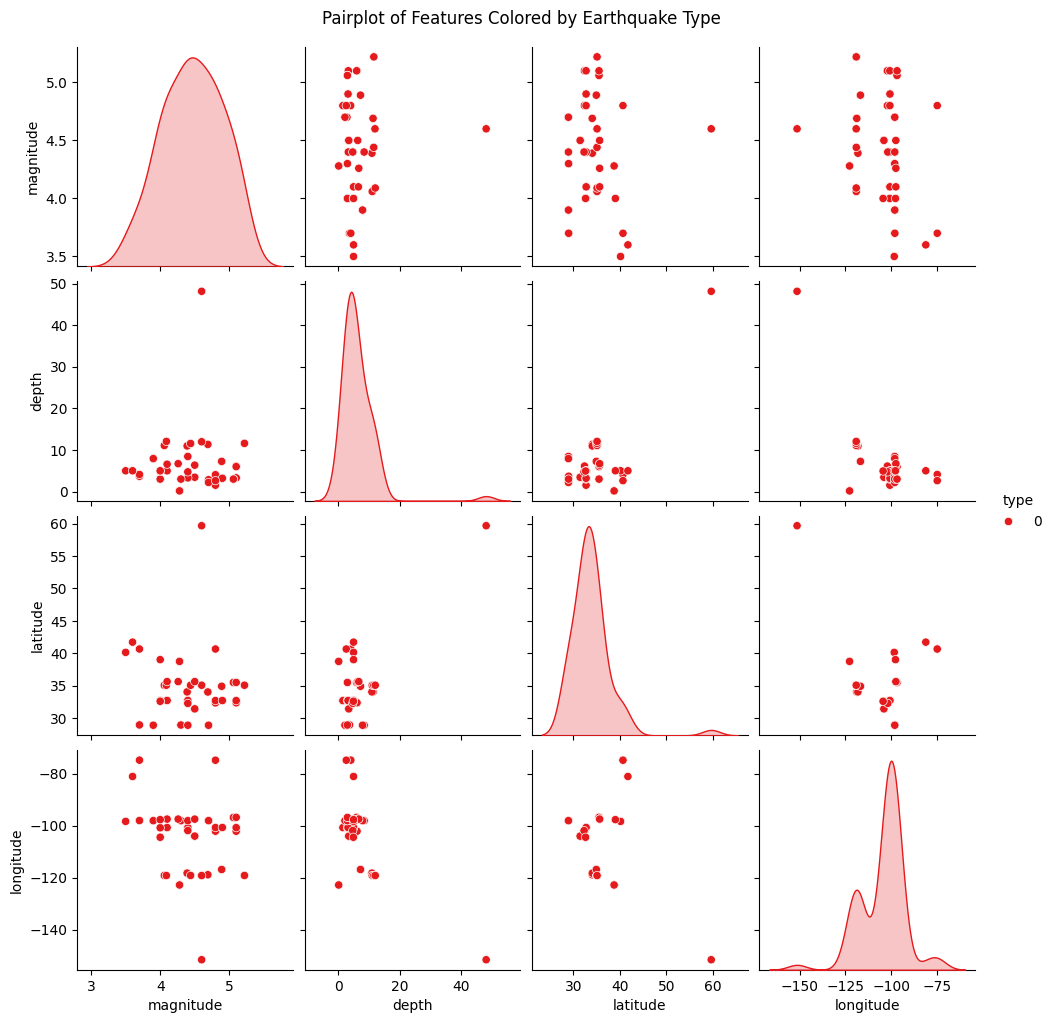

In [22]:
#1
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features for pairplot
features = ['magnitude', 'depth', 'latitude', 'longitude', 'type']

# Pairplot (scatterplot matrix)
sns.pairplot(df[features], hue='type', diag_kind='kde', palette='Set1', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Features Colored by Earthquake Type", y=1.02)
plt.show()
